In [ ]:
import pandas as pd
import json

## Analyse Dataset

In [ ]:
validation_set = pd.read_csv("full_valid_plaintext.txt", delimiter = "\t")
validation_set

,id,annotations
0,746634523048292352,"1103,1389,1399"
1,741650544847147009,1381
2,746803092239196162,1424
3,746625375875170304,1107
4,744724790485757952,1620
...,...,...
999995,747420757790162944,1620
999996,744673950962225152,544
999997,741743895000809472,1415
999998,745039072628899841,1447


In [ ]:
validation_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   id           1000000 non-null  object
 1   annotations  1000000 non-null  object
dtypes: object(2)
memory usage: 15.3+ MB


In [ ]:
test_set = pd.read_csv("full_test_plaintext.txt", delimiter = "\t")
test_set

,id,annotations
0,747643690521341953,1138
1,746196870121164800,1056
2,744595559470800896,1381
3,747720844730859520,"889,1128"
4,743285629576843264,1424
...,...,...
999995,742645704074481664,1105
999996,747015502791335936,1400
999997,744745632141737984,807
999998,747071768817471488,1389


In [ ]:
train_set = pd.read_csv("full_train_plaintext.txt", delimiter = "\t")
train_set

,id,annotations
0,744014442837454848,"47,883"
1,742407819496919041,1381
2,744101567981359105,1421
3,744692442033577984,1056
4,746426733834944512,"1056,1381"
...,...,...
12997214,744270931997171712,1210
12997215,743546441591721984,1447
12997216,742894986304344064,"12,114,1111"
12997217,741607748975132672,1428


### Break down of amount of quoted tweets in each dataset

In [ ]:
total_len_validation = len(validation_set)
num_quoted_validation = len(validation_set[(validation_set['id'].str[-2:] == '_q')])
print(f"Total # validation rows: {total_len_validation}")
print(f"Total # validation tweets containing a quoted tweet: {num_quoted_validation}")
print(f"Perecentage of quoted train tweets {round(num_quoted_validation / total_len_validation * 100, 1)}")
validation_set[(validation_set['id'].str[-2:] == "_q")].head()

Total # validation rows: 1000000
Total # validation tweets containing a quoted tweet: 53332
Perecentage of quoted train tweets 5.3


,id,annotations
9,748012561841389568_q,1420
46,741458946519621632_q,1447
58,744263530833055745_q,1403
84,745010501244035072_q,"763,1460"
96,746174203389415425_q,"26,738,1185,1213,1620"


In [ ]:
total_len_test = len(test_set)
num_quoted_test = len(test_set[(test_set['id'].str[-2:] == '_q')])
print(f"Total # test rows: {total_len_test}")
print(f"Total # test tweets containing a quoted tweet: {num_quoted_test}")
print(f"Perecentage of quoted train tweets {round(num_quoted_test / total_len_test * 100, 1)}")
test_set[(test_set['id'].str[-2:] == "_q")].head()

Total # test rows: 1000000
Total # test tweets containing a quoted tweet: 53482
Perecentage of quoted train tweets 5.3


,id,annotations
23,742700829703057408_q,820
46,743939302237868032_q,1136
53,743153394840272896_q,"203,763,764,1138,1493,1624"
81,743302376526741505_q,1389
91,742044368828256256_q,60


In [ ]:
total_len_train = len(train_set)
num_quoted_train = len(train_set[(train_set['id'].str[-2:] == '_q')])
print(f"Total # train rows: {total_len_train}")
print(f"Total # train tweets containing a quoted tweet: {num_quoted_train}")
print(f"Perecentage of quoted train tweets {round(num_quoted_train / total_len_train * 100, 1)}")
train_set[(train_set['id'].str[-2:] == "_q")].head()

Total # train rows: 12997219
Total # train tweets containing a quoted tweet: 690524
Perecentage of quoted train tweets 5.3


,id,annotations
5,744959564504793088_q,616
49,743969994900287490_q,1548
74,747922854994403328_q,"1390,1420"
88,743123395697639424_q,"703,1138"
96,747230482044067840_q,1210


### Check emoji mapping

In [ ]:
validation_set['annotations_split'] = validation_set['annotations'].map(lambda x: x.split(","))
validation_set.head()

,id,annotations,annotations_split
0,746634523048292352,"1103,1389,1399","[1103, 1389, 1399]"
1,741650544847147009,1381,[1381]
2,746803092239196162,1424,[1424]
3,746625375875170304,1107,[1107]
4,744724790485757952,1620,[1620]


In [ ]:
test_set['annotations_split'] = test_set['annotations'].map(lambda x: x.split(","))
train_set['annotations_split'] = train_set['annotations'].map(lambda x: x.split(","))

In [ ]:
overall_emojis = {}
train_emojis = {}
validation_emojis = {}
test_emojis = {}

def add_to_emoji_map(df, overall_emoji_set, dataset_emoji_set):
    for index, row in df.iterrows():
        if index % 100000 == 0:
            print(f"Iterating: currently on row {index}")
        emoji_list = row['annotations_split']
        for emoji in emoji_list:
            if emoji in overall_emoji_set:
                overall_emoji_set[emoji] += 1
            else:
                overall_emoji_set[emoji] = 1
            if emoji in dataset_emoji_set:
                dataset_emoji_set[emoji] += 1
            else:
                dataset_emoji_set[emoji] = 1
                
add_to_emoji_map(train_set, overall_emojis, train_emojis)
add_to_emoji_map(validation_set, overall_emojis, validation_emojis)
add_to_emoji_map(test_set, overall_emojis, test_emojis)

Iterating: currently on row 0
Iterating: currently on row 100000
Iterating: currently on row 200000
Iterating: currently on row 300000
Iterating: currently on row 400000
Iterating: currently on row 500000
Iterating: currently on row 600000
Iterating: currently on row 700000
Iterating: currently on row 800000
Iterating: currently on row 900000
Iterating: currently on row 1000000
Iterating: currently on row 1100000
Iterating: currently on row 1200000
Iterating: currently on row 1300000
Iterating: currently on row 1400000
Iterating: currently on row 1500000
Iterating: currently on row 1600000
Iterating: currently on row 1700000
Iterating: currently on row 1800000
Iterating: currently on row 1900000
Iterating: currently on row 2000000
Iterating: currently on row 2100000
Iterating: currently on row 2200000
Iterating: currently on row 2300000
Iterating: currently on row 2400000
Iterating: currently on row 2500000
Iterating: currently on row 2600000
Iterating: currently on row 2700000
Iterati

In [ ]:
## Number of emojis used in each set
print(f"Number of emojis used overall: {len(overall_emojis)}")
print(f"Number of emojis used in train: {len(train_emojis)}")
print(f"Number of emojis used in validation: {len(validation_emojis)}")
print(f"Number of emojis used in test: {len(test_emojis)}")

## Sanity check: emojis in various dataframe add up correctly to overall_emojis
for key, value in overall_emojis.items():
    num_train_emojis = train_emojis[key] if key in train_emojis else 0
    num_validation_emojis = validation_emojis[key] if key in validation_emojis else 0
    num_test_emojis = test_emojis[key] if key in test_emojis else 0
    assert num_train_emojis + num_validation_emojis + num_test_emojis == value
    
## If it's correct, we save the dictionary for future reference
with open("overall_emojis.json", "w") as fp:
    json.dump(overall_emojis, fp)
with open("train_emojis.json", "w") as fp:
    json.dump(train_emojis, fp)
with open("validation_emojis.json", "w") as fp:
    json.dump(validation_emojis, fp)
with open("test_emojis.json", "w") as fp:
    json.dump(test_emojis, fp)

Number of emojis used overall: 1327
Number of emojis used in train: 1327
Number of emojis used in validation: 1240
Number of emojis used in test: 1242


### Frequency of emojis that appear in all 3 datasets

In [ ]:
consistent_emojis = {}
for key, value in overall_emojis.items():
    if key in validation_emojis and key in test_emojis:
        consistent_emojis[key] = value

consistent_emojis = dict(sorted(consistent_emojis.items(), key=lambda item: item[1], reverse=True))
consistent_emojis

{'1381': 1574907,
 '1392': 636047,
 '1424': 592718,
 '186': 584126,
 '1447': 534102,
 '1389': 461014,
 '1420': 420738,
 '1620': 406601,
 '1403': 343614,
 '763': 335372,
 '762': 324014,
 '1107': 299258,
 '764': 297808,
 '1138': 289381,
 '761': 272248,
 '1446': 260122,
 '883': 219512,
 '1475': 218412,
 '1493': 215720,
 '1397': 212640,
 '1056': 212249,
 '830': 212191,
 '889': 198033,
 '1384': 195988,
 '1255': 191405,
 '1393': 186682,
 '1380': 183657,
 '1394': 176115,
 '1108': 168043,
 '1391': 162547,
 '1388': 161146,
 '78': 157714,
 '1399': 152608,
 '174': 144165,
 '1210': 144105,
 '1387': 141096,
 '1111': 136102,
 '1413': 128583,
 '1624': 128420,
 '1400': 122758,
 '1390': 120211,
 '1430': 118276,
 '1395': 117903,
 '1406': 116282,
 '635': 115920,
 '1114': 114889,
 '1109': 114379,
 '1097': 112811,
 '1128': 112686,
 '1396': 112194,
 '1431': 111068,
 '865': 110792,
 '901': 107297,
 '1407': 107229,
 '1421': 103440,
 '1383': 102421,
 '675': 101300,
 '1466': 100473,
 '1116': 98205,
 '1057': 961

In [ ]:
top_20 = ['1381', '1392', '1424', '186', '1447', '1389', '1420', '1620', '1403', '763', 
          '762', '1107', '764', '1138', '761', '1446', '883', '1475', '1493', '1397']

### Dropping tweets with > 1 emoji

In [ ]:
validation_set['num_emojis'] = validation_set['annotations_split'].apply(lambda x: len(x))
test_set['num_emojis'] = test_set['annotations_split'].apply(lambda x: len(x))
train_set['num_emojis'] = train_set['annotations_split'].apply(lambda x: len(x))
validation_set

,id,annotations,annotations_split,num_emojis
0,746634523048292352,"1103,1389,1399","[1103, 1389, 1399]",3
1,741650544847147009,1381,[1381],1
2,746803092239196162,1424,[1424],1
3,746625375875170304,1107,[1107],1
4,744724790485757952,1620,[1620],1
...,...,...,...,...
999995,747420757790162944,1620,[1620],1
999996,744673950962225152,544,[544],1
999997,741743895000809472,1415,[1415],1
999998,745039072628899841,1447,[1447],1


In [ ]:
single_emoji_validation = validation_set.drop(validation_set[(validation_set.num_emojis != 1)].index)
single_emoji_test = test_set.drop(test_set[(test_set.num_emojis != 1)].index)
single_emoji_train = train_set.drop(train_set[(train_set.num_emojis != 1)].index)

In [ ]:
single_emoji_validation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 785070 entries, 1 to 999999
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   id                 785070 non-null  object
 1   annotations        785070 non-null  object
 2   annotations_split  785070 non-null  object
 3   num_emojis         785070 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 29.9+ MB


In [ ]:
single_emoji_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 784798 entries, 0 to 999998
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   id                 784798 non-null  object
 1   annotations        784798 non-null  object
 2   annotations_split  784798 non-null  object
 3   num_emojis         784798 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 29.9+ MB


In [ ]:
single_emoji_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10197652 entries, 1 to 12997218
Data columns (total 4 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   id                 object
 1   annotations        object
 2   annotations_split  object
 3   num_emojis         int64 
dtypes: int64(1), object(3)
memory usage: 389.0+ MB


### Applying consistent emojis to single emoji dataset

In [ ]:
single_emoji_validation['consistent'] = single_emoji_validation['annotations'].apply(lambda x: x in consistent_emojis)
single_emoji_test['consistent'] = single_emoji_test['annotations'].apply(lambda x: x in consistent_emojis)
single_emoji_train['consistent'] = single_emoji_train['annotations'].apply(lambda x: x in consistent_emojis)

In [ ]:
single_emoji_validation = single_emoji_validation.drop(single_emoji_validation[
    (single_emoji_validation.consistent == False)].index)
single_emoji_test = single_emoji_test.drop(single_emoji_test[
    (single_emoji_test.consistent == False)].index)
single_emoji_train = single_emoji_train.drop(single_emoji_train[
    (single_emoji_train.consistent == False)].index)

In [ ]:
single_emoji_validation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 785053 entries, 1 to 999999
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   id                 785053 non-null  object
 1   annotations        785053 non-null  object
 2   annotations_split  785053 non-null  object
 3   num_emojis         785053 non-null  int64 
 4   consistent         785053 non-null  bool  
dtypes: bool(1), int64(1), object(3)
memory usage: 30.7+ MB


In [ ]:
single_emoji_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 784781 entries, 0 to 999998
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   id                 784781 non-null  object
 1   annotations        784781 non-null  object
 2   annotations_split  784781 non-null  object
 3   num_emojis         784781 non-null  int64 
 4   consistent         784781 non-null  bool  
dtypes: bool(1), int64(1), object(3)
memory usage: 30.7+ MB


In [ ]:
single_emoji_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10197375 entries, 1 to 12997218
Data columns (total 5 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   id                 object
 1   annotations        object
 2   annotations_split  object
 3   num_emojis         int64 
 4   consistent         bool  
dtypes: bool(1), int64(1), object(3)
memory usage: 398.7+ MB


### Emoji list

In [ ]:
emoji_map = pd.read_csv('emoji_map_1791.csv')
emoji_map

,Unnamed: 0,category,title,shorts,unicode_alternates,keywords,ucode_short,ucode,aliases,alt_title,aliases_ascii
0,#️⃣,symbols,keycap number sign,[hash],0023-fe0f-20e3,"[keycap, symbol, pound, hash, number]",0023_fe0f_20e3,#️⃣,NaN,NaN,NaN
1,*️⃣,symbols,keycap asterisk,[asterisk],002a-fe0f-20e3,"[keycap, symbol, asterisk, star]",002a_fe0f_20e3,*️⃣,[:keycap_asterisk:],NaN,NaN
2,0️⃣,symbols,keycap digit zero,[zero],0030-fe0f-20e3,"[, keycap, symbol, number, zero, math]",0030_fe0f_20e3,0️⃣,NaN,NaN,NaN
3,1️⃣,symbols,keycap digit one,[one],0031-fe0f-20e3,"[, keycap, symbol, number, one, math]",0031_fe0f_20e3,1️⃣,NaN,NaN,NaN
4,2️⃣,symbols,keycap digit two,[two],0032-fe0f-20e3,"[, keycap, symbol, two, number, math]",0032_fe0f_20e3,2️⃣,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1786,🦎,unicode9,lizard,[lizard],NaN,"[lizard, reptile]",1f98e,🦎,NaN,NaN,NaN
1787,🦏,unicode9,rhinoceros,[rhino],NaN,[rhinoceros],1f98f,🦏,[:rhinoceros:],NaN,NaN
1788,🦐,unicode9,shrimp,[shrimp],NaN,"[small, shellfish, shrimp]",1f990,🦐,NaN,NaN,NaN
1789,🦑,unicode9,squid,[squid],NaN,"[squid, molusc]",1f991,🦑,NaN,NaN,NaN


In [ ]:
emoji_map = emoji_map[['category', 'title', 'ucode']]
emoji_map['id'] = emoji_map.index.astype(object)
emoji_map

/var/folders/xz/z0kw7g5n10s5qncvzws5gxhr0000gn/T/ipykernel_79087/388660393.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emoji_map['id'] = emoji_map.index.astype(object)


,category,title,ucode,id
0,symbols,keycap number sign,#️⃣,0
1,symbols,keycap asterisk,*️⃣,1
2,symbols,keycap digit zero,0️⃣,2
3,symbols,keycap digit one,1️⃣,3
4,symbols,keycap digit two,2️⃣,4
...,...,...,...,...
1786,unicode9,lizard,🦎,1786
1787,unicode9,rhinoceros,🦏,1787
1788,unicode9,shrimp,🦐,1788
1789,unicode9,squid,🦑,1789


In [ ]:
emoji_map[emoji_map["id"] == 1447]

,category,title,ucode,id
1447,people,face with rolling eyes,🙄,1447


In [ ]:
emoji_map.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1791 entries, 0 to 1790
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  1788 non-null   object
 1   title     1791 non-null   object
 2   ucode     1791 non-null   object
 3   id        1791 non-null   object
dtypes: object(4)
memory usage: 56.1+ KB


### Check frequency of emojis

In [ ]:
freq_cleaned_train = single_emoji_train.groupby('annotations').count()
freq_cleaned_train = freq_cleaned_train[["num_emojis"]]
freq_cleaned_train = freq_cleaned_train.sort_values(by=['num_emojis'], ascending=False)
freq_cleaned_train

,num_emojis
annotations,
1381,1046494
1447,393323
1392,379555
1424,375040
186,310493
...,...
1356,1
649,1
726,1


In [ ]:
freq_cleaned_train['id'] = freq_cleaned_train.index.astype(object)
freq_cleaned_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1203 entries, 1381 to 210
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   num_emojis  1203 non-null   int64 
 1   id          1203 non-null   object
dtypes: int64(1), object(1)
memory usage: 28.2+ KB


In [ ]:
freq_cleaned_train[0:30]

,num_emojis,id
annotations,,
1381,1046494,1381
1447,393323,1447
1392,379555,1392
1424,375040,1424
186,310493,186
1389,297798,1389
1620,296932,1620
1420,282446,1420
1446,203802,1446


In [ ]:
merged = freq_cleaned_train.merge(emoji_map, how='left', on='id')
merged

,num_emojis,id,category,title,ucode
0,1046494,1381,NaN,NaN,NaN
1,393323,1447,NaN,NaN,NaN
2,379555,1392,NaN,NaN,NaN
3,375040,1424,NaN,NaN,NaN
4,310493,186,NaN,NaN,NaN
...,...,...,...,...,...
1198,1,1356,NaN,NaN,NaN
1199,1,649,NaN,NaN,NaN
1200,1,726,NaN,NaN,NaN
1201,1,729,NaN,NaN,NaN


In [ ]:
top_k_single_emojis = list(freq_cleaned_train.index[0:20])
top_k_freq = list(freq_cleaned_train['num_emojis'][0:20])
print(top_k_single_emojis)
print(top_k_freq)

['1381', '1447', '1392', '1424', '186', '1389', '1620', '1420', '1446', '1403', '1138', '1397', '1107', '830', '1384', '1056', '1380', '1394', '1393', '1399']
[1046494, 393323, 379555, 375040, 310493, 297798, 296932, 282446, 203802, 182672, 163109, 156822, 155140, 142055, 141233, 137876, 120045, 117414, 115341, 111566]


In [ ]:
print(list(zip(top_k_single_emojis, top_k_freq)))

[('1381', 1046494), ('1447', 393323), ('1392', 379555), ('1424', 375040), ('186', 310493), ('1389', 297798), ('1620', 296932), ('1420', 282446), ('1446', 203802), ('1403', 182672), ('1138', 163109), ('1397', 156822), ('1107', 155140), ('830', 142055), ('1384', 141233), ('1056', 137876), ('1380', 120045), ('1394', 117414), ('1393', 115341), ('1399', 111566)]


In [ ]:
import matplotlib.pyplot as plt

<AxesSubplot: xlabel='emoji'>

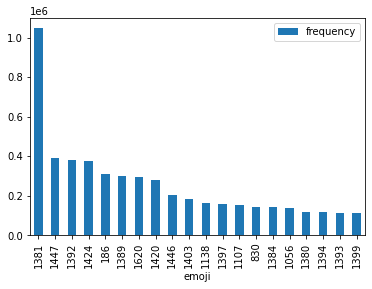

In [ ]:
df = pd.DataFrame(list(zip(top_k_single_emojis, top_k_freq)), columns=['emoji', 'frequency'])
df.plot(kind='bar', x='emoji')

### Create balanced dataset to download

In [ ]:
top_20 = set(top_k_single_emojis)

In [ ]:
single_emoji_validation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 785053 entries, 1 to 999999
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   id                 785053 non-null  object
 1   annotations        785053 non-null  object
 2   annotations_split  785053 non-null  object
 3   num_emojis         785053 non-null  int64 
 4   consistent         785053 non-null  bool  
dtypes: bool(1), int64(1), object(3)
memory usage: 30.7+ MB


In [ ]:
cleaned_validation = single_emoji_validation[['id', 'annotations']]
cleaned_validation = cleaned_validation[cleaned_validation['annotations'].isin(top_20)]
cleaned_validation = cleaned_validation[cleaned_validation['id'].str[-2:] != '_q']
cleaned_validation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374171 entries, 1 to 999999
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           374171 non-null  object
 1   annotations  374171 non-null  object
dtypes: object(2)
memory usage: 8.6+ MB


In [ ]:
cleaned_validation.groupby('annotations').count()

,id
annotations,
1056,10009
1107,11344
1138,11938
1380,8849
1381,75267
1384,10599
1389,22091
1392,27540
1393,8535


In [ ]:
single_emoji_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 784781 entries, 0 to 999998
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   id                 784781 non-null  object
 1   annotations        784781 non-null  object
 2   annotations_split  784781 non-null  object
 3   num_emojis         784781 non-null  int64 
 4   consistent         784781 non-null  bool  
dtypes: bool(1), int64(1), object(3)
memory usage: 30.7+ MB


In [ ]:
cleaned_test = single_emoji_test[['id', 'annotations']]
cleaned_test = cleaned_test[cleaned_test['annotations'].isin(top_20)]
cleaned_test = cleaned_test[cleaned_test['id'].str[-2:] != '_q']
cleaned_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375289 entries, 0 to 999998
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           375289 non-null  object
 1   annotations  375289 non-null  object
dtypes: object(2)
memory usage: 8.6+ MB


In [ ]:
cleaned_test.groupby("annotations").count()

,id
annotations,
1056,9814
1107,11364
1138,11962
1380,8841
1381,75693
1384,10439
1389,22048
1392,27759
1393,8615


In [ ]:
single_emoji_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10197375 entries, 1 to 12997218
Data columns (total 5 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   id                 object
 1   annotations        object
 2   annotations_split  object
 3   num_emojis         int64 
 4   consistent         bool  
dtypes: bool(1), int64(1), object(3)
memory usage: 398.7+ MB


In [ ]:
cleaned_train = single_emoji_train[['id', 'annotations']]
cleaned_train = cleaned_train[cleaned_train['annotations'].isin(top_20)]
cleaned_train = cleaned_train[cleaned_train['id'].str[-2:] != '_q']
cleaned_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4868874 entries, 1 to 12997218
Data columns (total 2 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   id           object
 1   annotations  object
dtypes: object(2)
memory usage: 111.4+ MB


In [ ]:
cleaned_train.groupby('annotations').count()

,id
annotations,
1056,129597
1107,148515
1138,155844
1380,115827
1381,980964
1384,136405
1389,285442
1392,360768
1393,111031


### Do a 8-1-1 train validation test split

Assuming we get 10,000 per emoji in valid/test, we only need to randomly choose 80,000 per emoji from train

In [ ]:
train_n = 80000
test_n = 10000

In [ ]:
final_validation = pd.DataFrame({"id":[], "annotations":[]})

for idx in top_20:
    filtered = cleaned_validation[cleaned_validation['annotations'] == idx]
    if len(filtered) > test_n:
        filtered = filtered.sample(n=test_n)
    final_validation = final_validation.append(filtered)

final_validation.info()

/var/folders/xz/z0kw7g5n10s5qncvzws5gxhr0000gn/T/ipykernel_57616/3605918549.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_validation = final_validation.append(filtered)
/var/folders/xz/z0kw7g5n10s5qncvzws5gxhr0000gn/T/ipykernel_57616/3605918549.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_validation = final_validation.append(filtered)
/var/folders/xz/z0kw7g5n10s5qncvzws5gxhr0000gn/T/ipykernel_57616/3605918549.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_validation = final_validation.append(filtered)
/var/folders/xz/z0kw7g5n10s5qncvzws5gxhr0000gn/T/ipykernel_57616/3605918549.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194573 entries, 341182 to 544836
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           194573 non-null  object
 1   annotations  194573 non-null  object
dtypes: object(2)
memory usage: 4.5+ MB


In [ ]:
final_validation.head()

,id,annotations
341182,744017003573293057,1392
158020,743344120937099264,1392
850526,744735410903998464,1392
418676,747553277345030144,1392
419406,741682875280412672,1392


In [ ]:
final_validation.groupby('annotations').count()

,id
annotations,
1056,10000
1107,10000
1138,10000
1380,8849
1381,10000
1384,10000
1389,10000
1392,10000
1393,8535


In [ ]:
## sanity check that there is no quoted tweets
final_validation[final_validation['id'].str[-2:] == '_q']

,id,annotations


In [ ]:
final_test = pd.DataFrame({"id":[], "annotations":[]})

for idx in top_20:
    filtered = cleaned_test[cleaned_test['annotations'] == idx]
    if len(filtered) > test_n:
        filtered = filtered.sample(n=test_n)
    final_test = final_test.append(filtered)

final_test.info()

/var/folders/xz/z0kw7g5n10s5qncvzws5gxhr0000gn/T/ipykernel_57616/1996348164.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_test = final_test.append(filtered)
/var/folders/xz/z0kw7g5n10s5qncvzws5gxhr0000gn/T/ipykernel_57616/1996348164.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_test = final_test.append(filtered)
/var/folders/xz/z0kw7g5n10s5qncvzws5gxhr0000gn/T/ipykernel_57616/1996348164.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_test = final_test.append(filtered)
/var/folders/xz/z0kw7g5n10s5qncvzws5gxhr0000gn/T/ipykernel_57616/1996348164.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_tes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194232 entries, 75546 to 960086
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           194232 non-null  object
 1   annotations  194232 non-null  object
dtypes: object(2)
memory usage: 4.4+ MB


In [ ]:
final_test.head()

,id,annotations
75546,743346794814308352,1392
208546,743973896072769536,1392
119014,744289933490270209,1392
753776,746348097836462080,1392
639724,741601191126126593,1392


In [ ]:
final_test.groupby('annotations').count()

,id
annotations,
1056,9814
1107,10000
1138,10000
1380,8841
1381,10000
1384,10000
1389,10000
1392,10000
1393,8615


In [ ]:
final_train = pd.DataFrame({"id":[], "annotations":[]})

for idx in top_20:
    filtered = cleaned_train[cleaned_train['annotations'] == idx]
    if len(filtered) > train_n:
        filtered = filtered.sample(n=train_n)
    final_train = final_train.append(filtered)

final_train.info()

/var/folders/xz/z0kw7g5n10s5qncvzws5gxhr0000gn/T/ipykernel_57616/3295027862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_train = final_train.append(filtered)
/var/folders/xz/z0kw7g5n10s5qncvzws5gxhr0000gn/T/ipykernel_57616/3295027862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_train = final_train.append(filtered)
/var/folders/xz/z0kw7g5n10s5qncvzws5gxhr0000gn/T/ipykernel_57616/3295027862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_train = final_train.append(filtered)
/var/folders/xz/z0kw7g5n10s5qncvzws5gxhr0000gn/T/ipykernel_57616/3295027862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600000 entries, 1711849 to 9711331
Data columns (total 2 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   id           1600000 non-null  object
 1   annotations  1600000 non-null  object
dtypes: object(2)
memory usage: 36.6+ MB


In [ ]:
final_train.head()

,id,annotations
1711849,742147551999098880,1392
3276636,742931942396559360,1392
1792632,742621305782951937,1392
12445220,747965888284999680,1392
9753680,743562039872872448,1392


In [ ]:
final_train.groupby('annotations').count()

,id
annotations,
1056,80000
1107,80000
1138,80000
1380,80000
1381,80000
1384,80000
1389,80000
1392,80000
1393,80000


In [ ]:
for idx in top_20:
    train_idx = final_train[final_train['annotations'] == idx]
    train_idx.to_csv(f'train/train_{idx}.csv')
    
    test_idx = final_test[final_test['annotations'] == idx]
    test_idx.to_csv(f'test/test_{idx}.csv')
    
    validation_idx = final_validation[final_validation['annotations'] == idx]
    validation_idx.to_csv(f'validation/validation_{idx}.csv')